In [10]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
# import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <font color="red">*Exercise 1*</font>

<font color="red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the [MTurk slides on Canvas](https://canvas.uchicago.edu/courses/39937/files/6674661?wrap=1), or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

In [ ]:
x = np.loadtxt("/content/uncoded.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

In [ ]:
anno.annotations

array([[1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       ...,
       [2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

In [ ]:
anno.labels

[0.0, 1.0, 2.0]

In [ ]:
anno.missing_values

[]

**The data I will use for my final project is about personality - MBTI. There are 16 types of personalities in total. I just focused on 2 of them (i.e.  INTP and ENFP) for this HW. I asked 3 friends to be the annotators, each of them coded for 500 cases. I randomly selected a subset of data from both personality types and it ended up being very unbalanced :(  
0 = INTP, 1 = ENFP**

In [ ]:
x = np.loadtxt("/content/uncoded.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

In [ ]:
anno.annotations

array([[0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
anno.labels

[0.0, 1.0]

In [ ]:
anno.missing_values

[]

[[383.  15.]
 [ 11.  91.]]


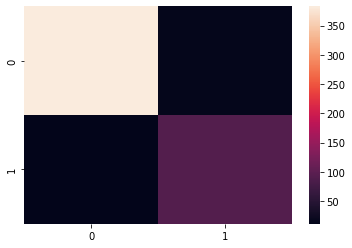

In [ ]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],2)
print(c)
ac = seaborn.heatmap(c)
plt.show()

[[382.  12.]
 [ 13.  93.]]


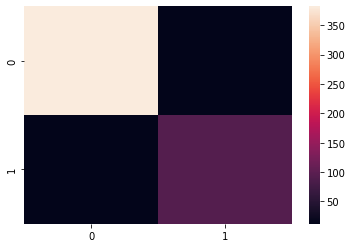

In [ ]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,1], anno.annotations[:,2],2)
print(c)
ac = seaborn.heatmap(c)
plt.show()

[[386.  12.]
 [  9.  93.]]


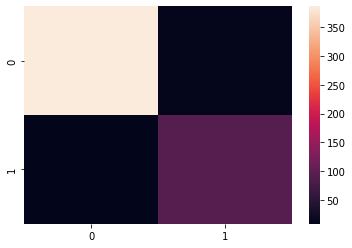

In [ ]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,2],2)
print(c)
ac = seaborn.heatmap(c)
plt.show()

In [ ]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.842171717171717

In [ ]:
scotts_pi(anno.annotations[:,1], anno.annotations[:,2])

0.8498309096042141

In [ ]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,2])

0.8720690096313758

According to the confusion matrix and scotts_pi, I would say that the overall agreement between my 3 coders is moderately high (i.e. moderate reliability). The instances in each category is unbalanced in the data, that's why we see a purple color on the bottom right corner   

## <font color="red">*Exercise 2*</font>

<font color="red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<font color="red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

##10 Artificial Datasets

In [ ]:
#1 
noise = .2
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.andSplit(noise), test_size=.2)

In [ ]:
#Random Forest performed the best both in terms of the metrics and the plot. 
clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.055,0.945113,0.951923,0.927527,0.942857
1,0.055,0.945113,0.937500,0.913158,0.947368


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


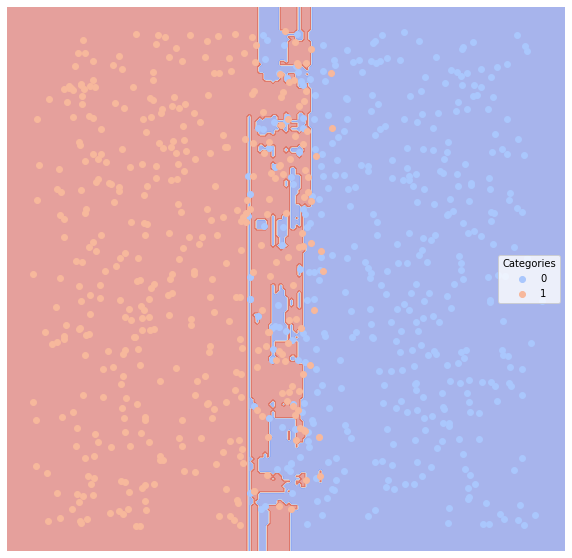

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#2 
noise = .5
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.andSplit(noise), test_size=.2)

In [ ]:
#As noise increaesd, ensemble method becomes better for prediction 
#since it deals with the overfitting issue 
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.27,0.731092,0.766667,0.683627,0.676471
1,0.27,0.731092,0.700000,0.655000,0.785714


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


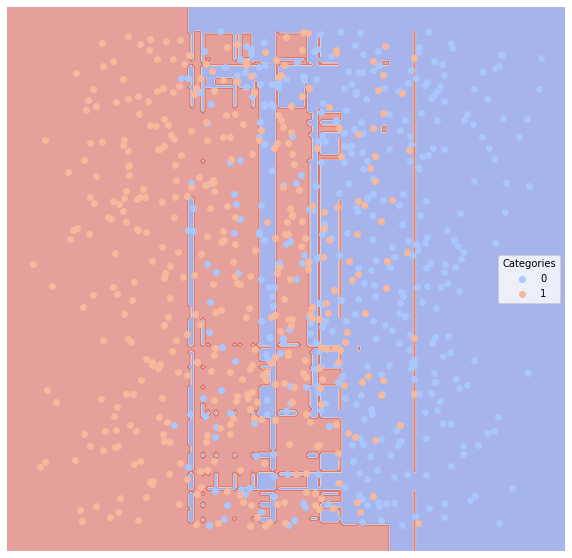

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#3
noise = .8
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.andSplit(noise), test_size=.2)

In [ ]:
 #As the noise kept increasing, all of the models performed poorly, 
 #KNN again performed slightly better than other models 
clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.455,0.546036,0.47,0.449882,0.552941
1,0.455,0.546036,0.62,0.599261,0.539130


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


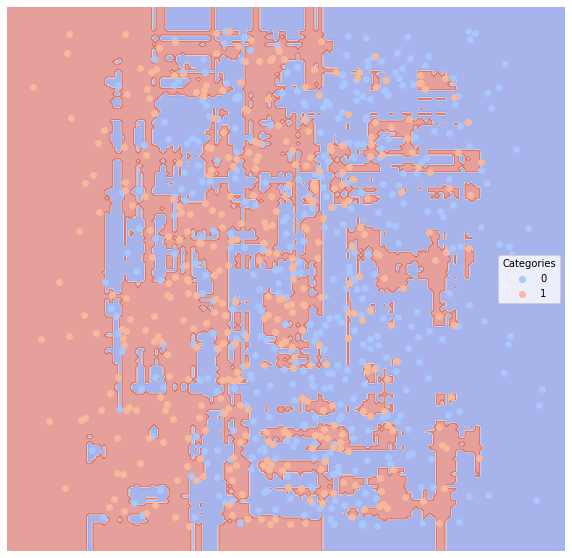

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#4
noise = .2
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.xorSplit(noise), test_size=.2)

In [ ]:
#Neural network and ensemble performed equally well 
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.11,0.890727,0.910891,0.863114,0.876190
1,0.11,0.890727,0.868687,0.831390,0.905263


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


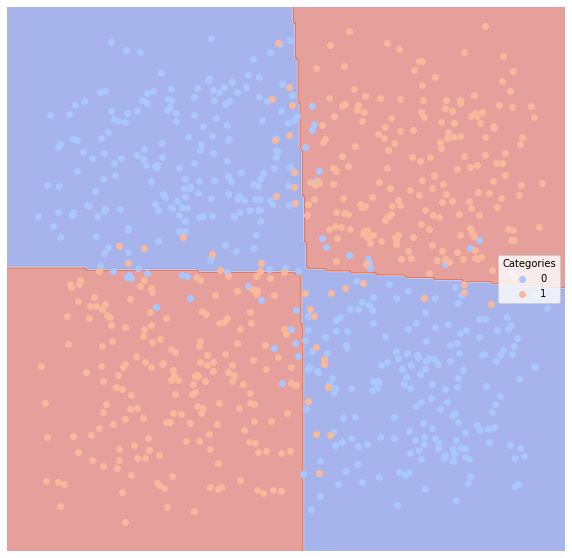

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.11,0.891228,0.919192,0.866633,0.866667
1,0.11,0.891228,0.861386,0.828848,0.915789


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


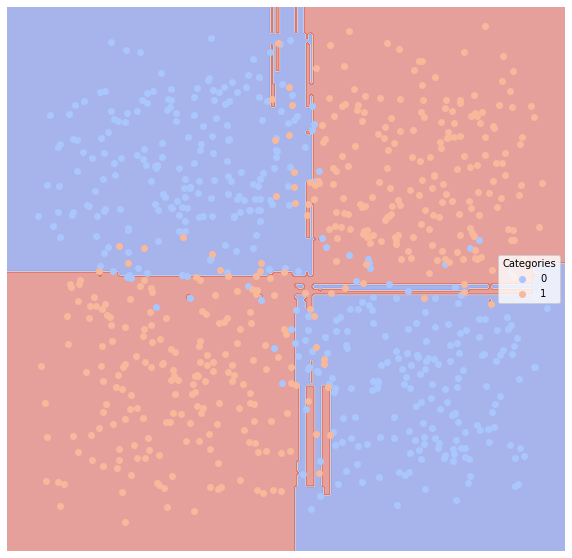

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#5
noise = .8
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.xorSplit(noise), test_size=.2)

In [ ]:
#Ensemble still does a better job as noise increased 
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.365,0.632176,0.617978,0.556583,0.585106
1,0.365,0.632176,0.648649,0.610592,0.679245


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


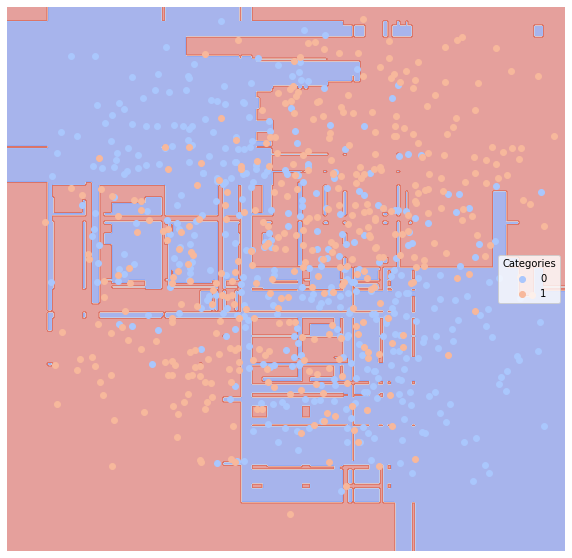

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#6
noise = 0.2
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.targetSplit(noise), test_size=.2)

In [ ]:
#Ensemble performed the best 
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.09,0.910997,0.936937,0.902317,0.904348
1,0.09,0.910997,0.876404,0.839230,0.917647


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


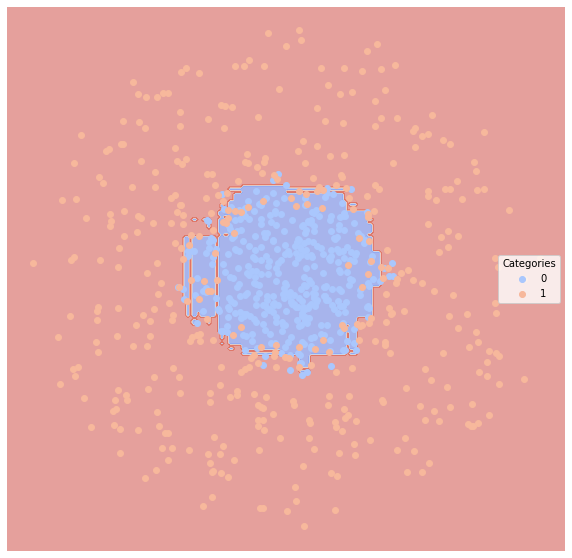

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#7
noise = 0.8
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.targetSplit(noise), test_size=.2)

In [ ]:
#Ensemble persistently performed better than other models 
#probably b/c it is suited to deal with more complex and more noisy tasks
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.405,0.598339,0.563910,0.546564,0.765306
1,0.405,0.598339,0.656716,0.573289,0.431373


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


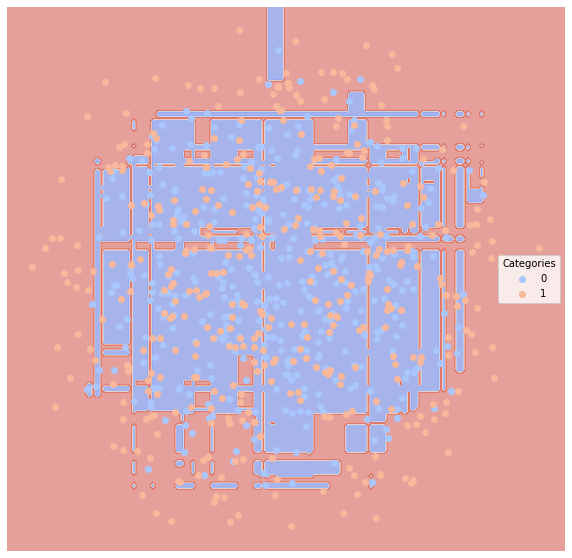

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#8
noise = 0.2
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.multiBlobs(noise), test_size=.2)

In [ ]:
#All models performed pretty well. KNN had the best graph
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.002,0.995455,1.000000,0.992909,0.990909
1,0.016,0.986095,0.930693,0.922896,0.989474
2,0.016,0.960731,0.988372,0.927170,0.923913
3,0.002,0.998753,0.990000,0.990000,1.000000
4,0.000,1.000000,1.000000,1.000000,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

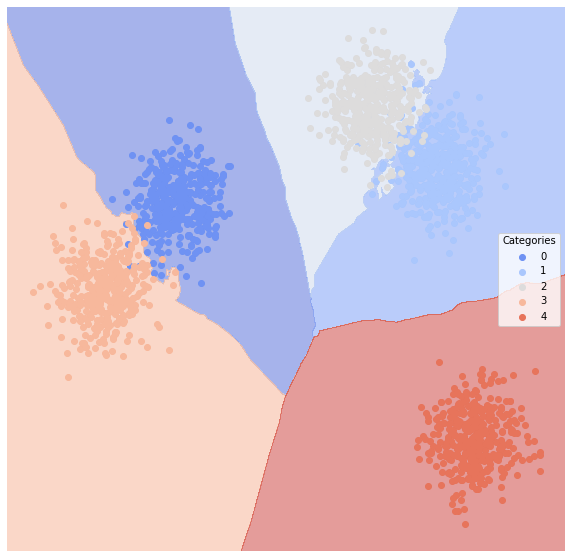

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#9
noise = 0.5
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.multiBlobs(noise), test_size=.2)

In [ ]:
#Models made perfect predictions for category 4  
#linear SVM did slightly better overall  
clf = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.156,0.729052,0.563218,0.390087,0.550562
1,0.002,0.994898,1.000000,0.991796,0.989796
2,0.136,0.795057,0.676190,0.525234,0.676190
3,0.034,0.951848,0.900990,0.850634,0.928571
4,0.000,1.000000,1.000000,1.000000,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

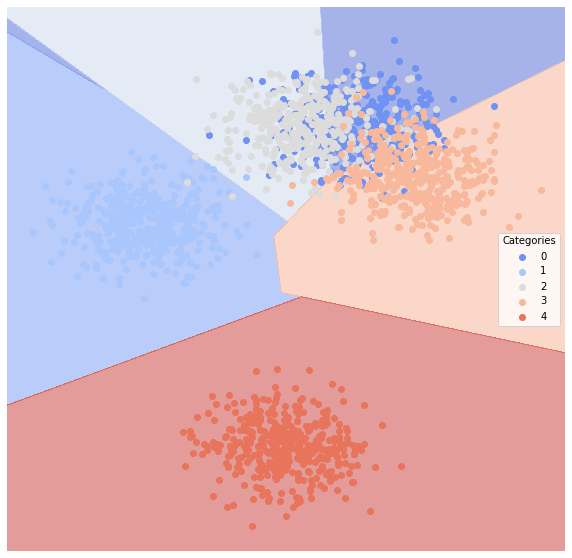

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#10 
noise = 0.8
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.multiBlobs(noise), test_size=.2)

In [ ]:
#As the task became more difficult, neural network beated all 
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.018,0.972133,0.946237,0.913096,0.956522
1,0.066,0.890379,0.813187,0.700620,0.822222
2,0.084,0.875992,0.805556,0.690920,0.805556
3,0.012,0.981917,0.971429,0.949673,0.971429
4,0.056,0.912116,0.873786,0.778960,0.857143


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

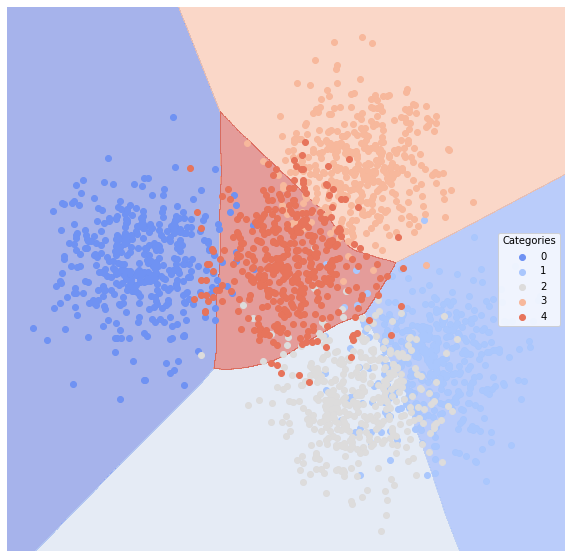

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

##Empirical Data 


- **Reddit**: regression and linear SVM performed equally good => lowest error rate and higest AUC for all 4 clusters 
- **NewsGroup**: regression did the best => lowest error rate, highest accuracy, plot with clear boundaries
- **Senate small** : neural network model and linear SVM performed pretty good => although some other models could have lower error rates or higher accuracies, they tend to have a lot of misclassifications (i.e. data points being assigned to wrong category) when plot the results.  
- **Senate large**: all don't perform as well based on the plots; neural network is slightly better   
- **Spam**: none of them did a good job. neural network did slightly better according to the error rates and accuracies 

In [ ]:
#Reddit

In [ ]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

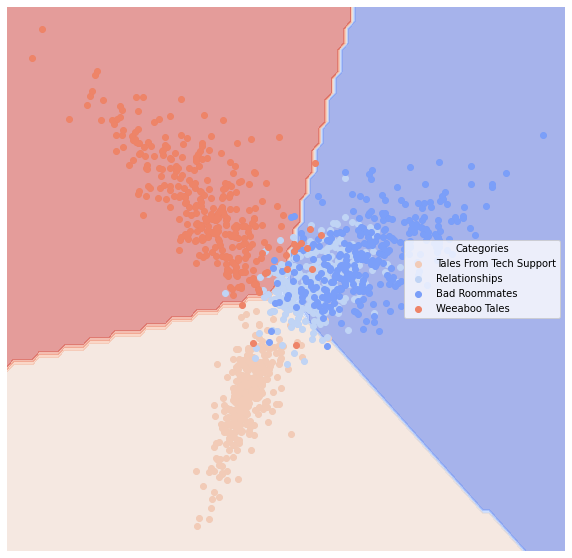

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
 #Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.012500,0.991031,0.960396,0.960396,1.000000
Relationships,0.021875,0.965038,0.955882,0.912969,0.942029
Bad Roommates,0.021875,0.968161,0.961039,0.924255,0.948718
Weeaboo Tales,0.006250,0.986842,1.000000,0.979934,0.973684


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

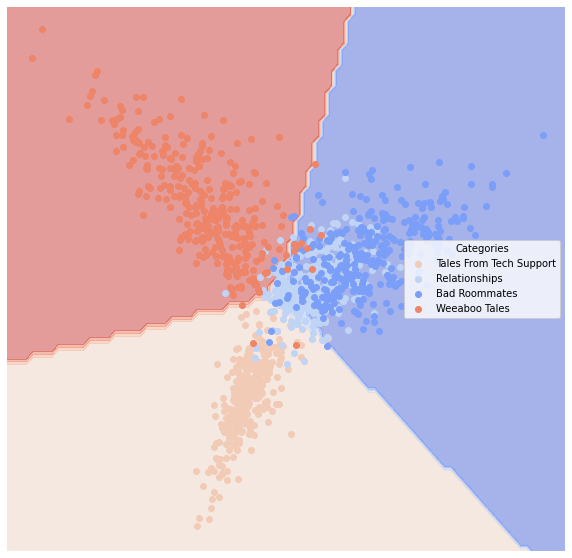

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#Senate small 

In [ ]:
 #Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.01462,0.981618,1.000000,0.977855,0.963235
Clinton,0.01462,0.981618,0.976303,0.976303,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


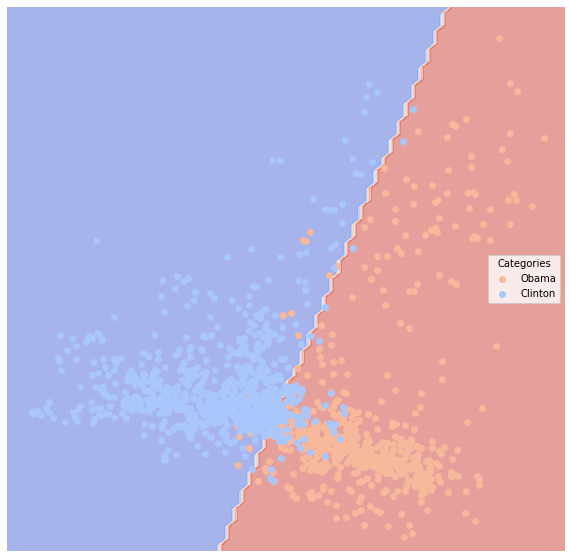

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.05848,0.936465,0.939394,0.891594,0.911765
Clinton,0.05848,0.936465,0.942857,0.929633,0.961165


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


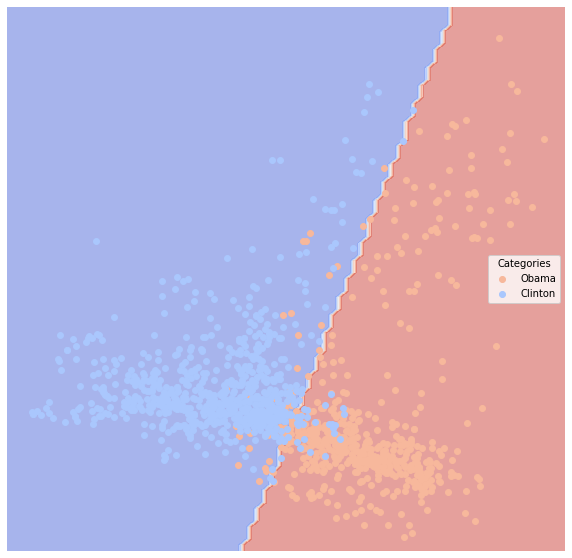

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#Senate large 

In [ ]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.007682,0.957746,1.000000,0.923175,0.915493
Kyl,0.006402,0.985343,0.982301,0.960292,0.973684
Kohl,0.007682,0.964573,0.985294,0.923273,0.930556
Kennedy,0.040973,0.960935,0.932153,0.917864,0.972308
Kerry,0.037132,0.948631,0.933673,0.879091,0.919598


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

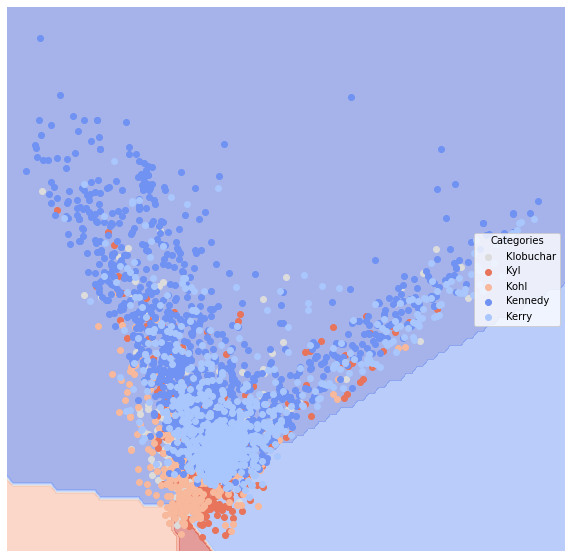

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#NewsGroup 

In [ ]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.055319,0.913271,0.937500,0.834276,0.846774
misc.forsale,0.053191,0.921657,0.884615,0.802751,0.876190
comp.windows.x,0.040426,0.944406,0.934426,0.875601,0.912000
rec.autos,0.063830,0.937342,0.825758,0.790821,0.939655


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

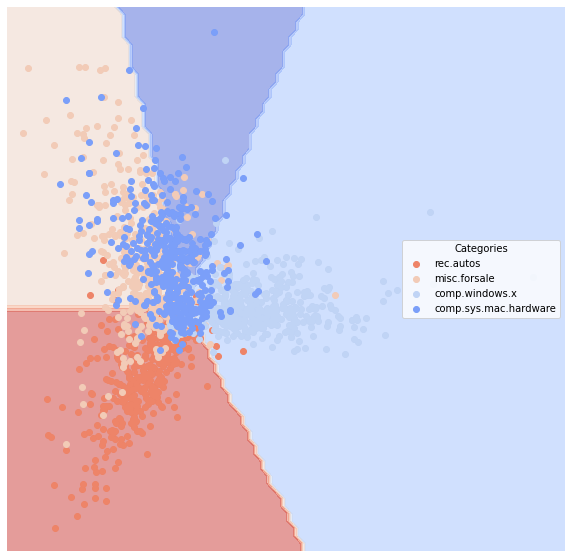

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

In [ ]:
#Spam

In [ ]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.084672,0.822531,0.680851,0.514511,0.695652
not spam,0.084672,0.822531,0.952623,0.948225,0.949410


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


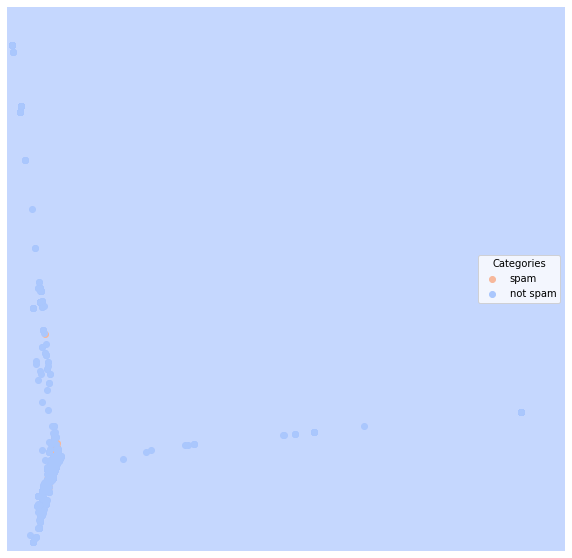

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

## <font color="red">*Exercise 3*</font>

<font color="red">In the cells immediately following, perform logistic regression classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk in Exercise 1). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [11]:
mbti = pandas.read_csv("/content/uncoded.csv", index_col=0)

In [ ]:
mbti.head(5)

,posts,type,coder1,coder2,coder3
38492,learn apply generally even specifically attrib...,INTP,0,0,0
57961,cosmic force make much sense really fit every ...,ENFP,1,1,1
56115,thing everything whole universe playground som...,ENFP,1,1,1
24254,help motivate well blame completely disinteres...,INTP,0,0,0
44414,philosophy college love every second see study...,INTP,1,0,1


In [ ]:
mbti['category'] = np.where(mbti['type'] == 'INTP', 0, 1)

In [17]:
def generateVecs(df, sents = False):
    df['tokenized_text'] = df['posts'].apply(lambda x: lucem_illud.word_tokenize(x))
    df['normalized_text'] = df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

    if sents:
        df['tokenized_sents'] = df['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
        df['normalized_sents'] = df['tokenized_sents'].apply(lambda x: [lucem_illud.normlizeTokens(s) for s in x])

    ngCountVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
    newsgroupsVects = ngCountVectorizer.fit_transform([' '.join(l) for l in df['normalized_text']])
    df['vect'] = [np.array(v).flatten() for v in newsgroupsVects.todense()]
    return df

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(np.stack(generateVecs(mbti)['vect'], axis=0),mbti['coder3'],test_size=0.1,random_state=42)

In [19]:
logistic = sklearn.linear_model.LogisticRegression(penalty = 'l2')

In [20]:
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

In [21]:
matrix = metrics.confusion_matrix(y_test, y_pred)

In [22]:
matrix

array([[38,  0],
       [12,  0]])

Text(0.5, 257.44, 'Predicted label')

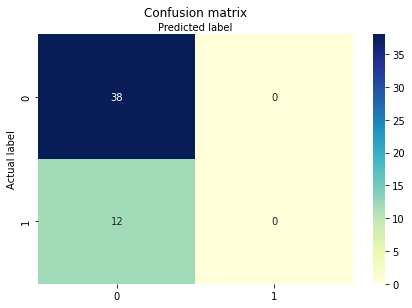

In [ ]:
#reference: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
from sklearn.metrics import roc_curve, auc

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("AUC:",metrics.auc(fpr, tpr))

F1 Score: 0.0
Precision: 0.0
Recall: 0.0
AUC: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


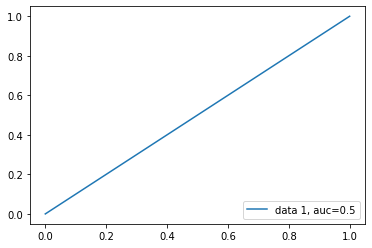

In [25]:
y_pred_proba = logistic.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(metrics.auc(fpr, tpr)))
plt.legend(loc=4)
plt.show()

In [35]:
len(mbti[mbti['type'] == 'INTP'])

404

In [36]:
len(mbti[mbti['type'] == 'ENFP'])

96

The logistic regression classifier performed extremely poorly. It might look odd at the begining. But, since the instances in each category (0 or 1) are very unbalanced (404 cases of 0 and 96 cases of 1), it makes sense that we get this result. We don't have enough data to make accurate predictions for class 1 so it is constantly being assigned to the wrong label.   

## <font color="red">*Exercise 4*</font>

<font color="red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


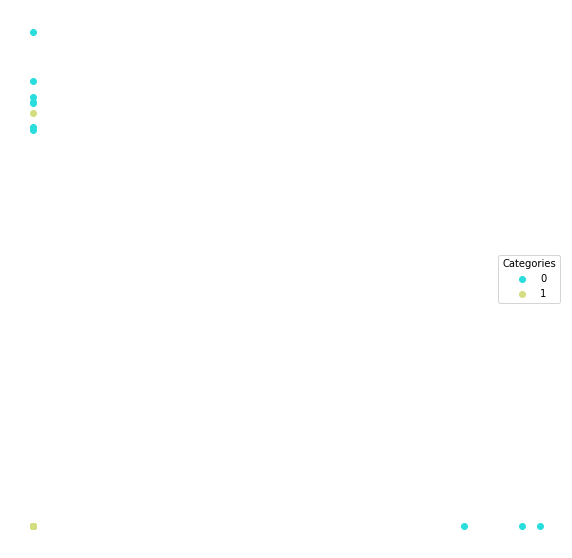

In [ ]:
df_exampleTree_train, df_exampleTree_test = sklearn.model_selection.train_test_split(mbti, test_size=.2)
lucem_illud.plotter(df_exampleTree_train)

In [ ]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(max_depth=4, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


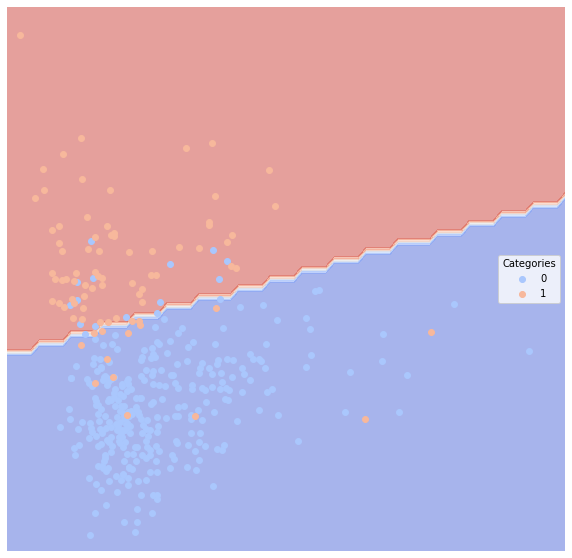

In [ ]:
lucem_illud.plotregions(clf_tree, df_exampleTree_train)

In [ ]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.08,0.815686,0.942529,0.939263,0.964706
1,0.08,0.815686,0.769231,0.562821,0.666667


In [ ]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.92

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)


In [ ]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=0.8, n_estimators=100, random_state=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


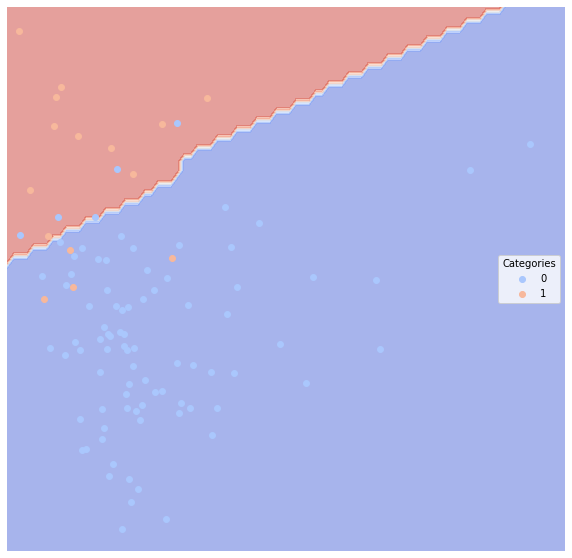

In [ ]:
lucem_illud.plotregions(bag, df_exampleTree_test)

In [ ]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.05,0.860784,0.954545,0.953316,0.988235
1,0.05,0.860784,0.916667,0.712222,0.733333


Ensemble classifier does a better job than decision tree. The improvement is most obvious in the "precision" column. It is expected because ensemble learning is supposed to combine multiple overfitted estimator in training to improve the precision

## <font color="red">*Exercise 5*</font>

<font color="red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [ ]:
holdBackFraction = .2
train_df, test_df = sklearn.model_selection.train_test_split(mbti, test_size=holdBackFraction)

In [ ]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer_ng.fit_transform(train_df['posts'])
train_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [ ]:
clf_knearest.fit(np.stack(train_df['vect'], axis = 0), train_df['category'])

KNeighborsClassifier(n_neighbors=15)

In [ ]:
lucem_illud.evaluateClassifier(clf_knearest, train_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.135,0.671272,0.857143,0.856956,0.996865
1,0.135,0.671272,0.965517,0.466259,0.345679


In [ ]:
TFVects_test = TFVectorizer_ng.transform(test_df['posts'])
test_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_df['predict'] = clf_knearest.predict(np.stack(test_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_df['vect'], axis=0), test_df['category']))

Testing score:
0.86


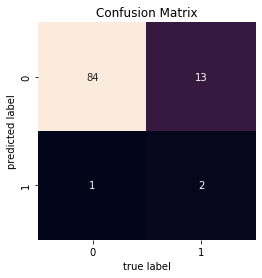

In [ ]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_df)

The performance of the K-nearest neighbor classifier does a poor job. Again, it confirms that it is relatively harder to predict class 1 with the lack of data. It is different from K-means since KNN makes classifications based on known labels in the data while K-means makes classifications without known labels in the data. 

## <font color="red">*Exercise 6*</font>

<font color="red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, logistic and decision-tree approaches?

In [ ]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

MLPClassifier()

In [ ]:
lucem_illud.evaluateClassifier(clf_nn, test_df)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.15,0.5,0.85,0.85,1.0
1,0.15,0.5,0.00,0.15,0.0


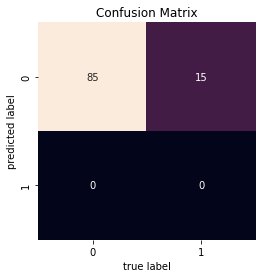

In [ ]:
lucem_illud.plotConfusionMatrix(clf_nn, test_df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


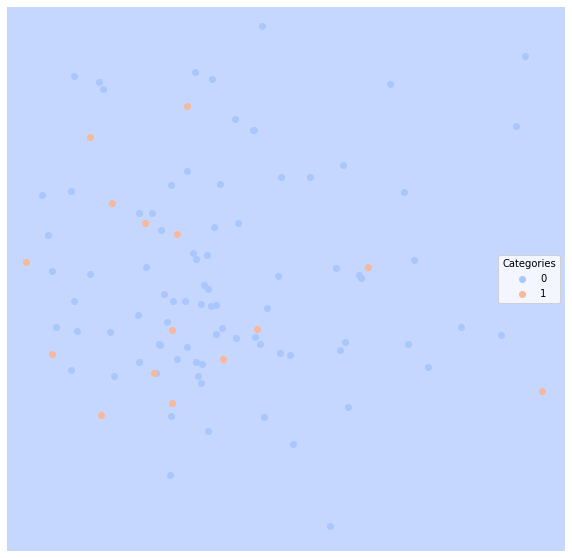

In [ ]:
lucem_illud.plotregions(clf_nn, test_df)

With the sample data I have, the neural network classifier doesn't perform well as expected. In fact, model prediction is just as accurate as predicted by chance. Overall, ensemble learning performed the best.

## <font color="red">*Exercise 7*</font>

<font color="red">In the cells immediately following, use the pipeline functions or the word or sentence vector functions (e.g., similarity) to explore the social game underlying the production and meaning of texts associated with your final project. How does BERT help you gain insight regarding your research question that is similar and different from prior methods?

In [42]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [43]:
mbti = pandas.read_csv('/content/MyDrive/MyDrive/My_Data/MBTI 500.csv')

In [44]:
mbti = mbti[mbti["type"] == 'INFJ']

In [45]:
s = ''
for _ in np.array(mbti['posts'][:100]):
  s += str(_)

In [ ]:
from transformers import pipeline
nlp = pipeline("question-answering")
context = s

In [49]:
result = nlp(question="What is INFJ personality", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:707: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:299: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'bully', score: 0.5283, start: 156372, end: 156377


Hillarious, but maybe it is true. 